In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fundatastats/Suicides_in_India.csv.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [ ]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0


In [ ]:
df.tail()

,State,Year,Type_code,Type,Gender,Age_group,Total
237514,WEST BENGAL,2012,Professional_Profile,Professional Activity,Male,60+,0
237515,WEST BENGAL,2012,Professional_Profile,Self-employed (Business activity),Male,0-14,0
237516,WEST BENGAL,2012,Professional_Profile,Service (Government),Male,15-29,0
237517,WEST BENGAL,2012,Professional_Profile,Service (Government),Male,60+,0
237518,WEST BENGAL,2012,Social_Status,Never Married,Male,0-100+,2658


In [ ]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [ ]:
a = df[df['State'] != 'TOTAL (ALL INDIA)']
a.iloc[a['Total'].idxmax()]

State            RAJASTHAN
Year                  2009
Type_code    Means_adopted
Type           By Drowning
Gender              Female
Age_group             0-14
Total                   18
Name: 212815, dtype: object

In [ ]:
df['State'].value_counts()

MADHYA PRADESH       6792
MAHARASHTRA          6792
KARNATAKA            6792
ODISHA               6791
ANDHRA PRADESH       6791
RAJASTHAN            6791
BIHAR                6790
CHHATTISGARH         6790
HARYANA              6790
KERALA               6788
UTTAR PRADESH        6787
ASSAM                6786
TAMIL NADU           6786
GUJARAT              6786
JHARKHAND            6785
TRIPURA              6782
DELHI (UT)           6782
WEST BENGAL          6780
PUNJAB               6779
HIMACHAL PRADESH     6774
JAMMU & KASHMIR      6761
GOA                  6759
UTTARAKHAND          6758
SIKKIM               6742
MIZORAM              6737
MEGHALAYA            6733
PUDUCHERRY           6730
CHANDIGARH           6717
A & N ISLANDS        6712
DAMAN & DIU          6710
ARUNACHAL PRADESH    6707
NAGALAND             6705
D & N HAVELI         6704
MANIPUR              6700
LAKSHADWEEP          6674
TOTAL (ALL INDIA)     312
TOTAL (STATES)        312
TOTAL (UTs)           312
Name: State,

In [ ]:
state  = {
    'A & N ISLANDS':'AN',
    'ANDHRA PRADESH':'AP',
    'ARUNACHAL PRADESH': 'AR',
    'ASSAM':'AS',
    'BIHAR': 'BR',
    'CHANDIGARH':'CH',
    'CHHATTISGARH': 'CT',
    'D & N HAVELI': 'DN',
    'DAMAN & DIU': 'DD',
    'DELHI (UT)':'DL',
    'GOA':'GA',
    'GUJARAT':'GJ',
    'HARYANA':'HR',
    'HIMACHAL PRADESH':'HP',
    'JAMMU & KASHMIR':'JK',
    'JHARKHAND':'JH',
     'KARNATAKA':'KA',
       'KERALA':'KL',
        'LAKSHADWEEP':'LD',
         'MADHYA PRADESH':'MP',
          'MAHARASHTRA':'MH',
       'MANIPUR':'MN',
        'MEGHALAYA':'ML',
         'MIZORAM':'MZ',
          'NAGALAND':'NL', 
          'ODISHA':'OR',
       'PUDUCHERRY':'PY',
        'PUNJAB':'PB', 
        'RAJASTHAN':'RJ',
         'SIKKIM':'SK',
          'TAMIL NADU':'TN',
       'TOTAL (STATES)':'TOTAL (STATES)',
        'TOTAL (UTs)':'TOTAL (UTs)',
         'TRIPURA':'TR',
          'UTTAR PRADESH':'UP',
       'UTTARAKHAND':'UT',
        'WEST BENGAL':'WB',
        'TOTAL (ALL INDIA)':'TOTAL (ALL INDIA)'
}

In [ ]:
new_df = df.copy()

In [ ]:
new_df['new_state'] = new_df['State'].apply(lambda x: state[x])
new_df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total,new_state
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0,AN
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0,AN
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0,AN
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0,AN
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0,AN


In [ ]:

new_df.drop('State',axis=1,inplace=True)

In [ ]:
a = {
    'Hr. Secondary/Intermediate/Pre-Universit': 'pre-uni',
     'Middle': 'Middle',
     'Diploma':'Diploma',
     'Matriculate/Secondary':'Secondary',
     'No Education':'No Education',
      'Post Graduate and Above':'PG',
       'Primary':'Primary', 
     'Graduate':'Graduate',
     'Divorcee':'Divorcee',
     'Married':'Married',
     'Seperated':'Divorcee',
     'Widowed/Widower':'Divorcee',
     'Never Married':'Never Married' ,
    'By Consuming Insecticides':'Insecticides',
     'By Consuming Other Poison':'Poison',
       'By Drowning':'Drowning',
      'By Fire-Arms':'Fire-Arms'
      , 'By Fire/Self Immolation':'Fire Immolation',
       'By Hanging':'By Hanging',
      'By Jumping from (Building)':'Jump Building',
       'By Jumping from (Other sites)':'Jump Other sites',
       'By Jumping off Moving Vehicles/Trains':'Jump Moving Vehicles',
      'By Machine':'By Machine',
       'By Other means':'Other means',
      'By Other means (please specify)':'Other means',
       'By Over Alcoholism':'Over Alcoholism',
      'By Overdose of sleeping pills':'sleeping pills',
       'By Self Infliction of injury':'Self Infliction',
       'By coming under running vehicles/trains':'under running vehicles',
       'By touching electric wires':'electric wires',
     'Ideological Causes/Hero Worshipping':'Hero Worship',
     'Self-employed (Business activity)':'Business activity',
     'Illness (Aids/STD)':'illness',
     'Bankruptcy or Sudden change in Economic Status':'Economic Status change',
     'Suspected/Illicit Relation':'Illicit Relation',
     'Professional/Career Problem':'Professional problem'}

def convert_type(x):
    try:
        return a[x]
    except:
        return x

new_df['Type'] = new_df['Type'].apply(lambda x: convert_type(x))

In [ ]:
new_df['Type']

0                        Cancer
1                       Divorce
2                 Dowry Dispute
3                  Hero Worship
4                       illness
                  ...          
237514    Professional Activity
237515        Business activity
237516     Service (Government)
237517     Service (Government)
237518            Never Married
Name: Type, Length: 237519, dtype: object

In [ ]:
print(len(a),new_df['Type'].nunique())

36 66


In [ ]:
new_df.to_csv("suicides_preprocessed.csv",index=False)

In [ ]:
new_df['Year'].value_counts()

2011    19806
2005    19803
2012    19799
2001    19797
2008    19797
2007    19794
2010    19792
2002    19790
2003    19786
2006    19786
2009    19786
2004    19783
Name: Year, dtype: int64

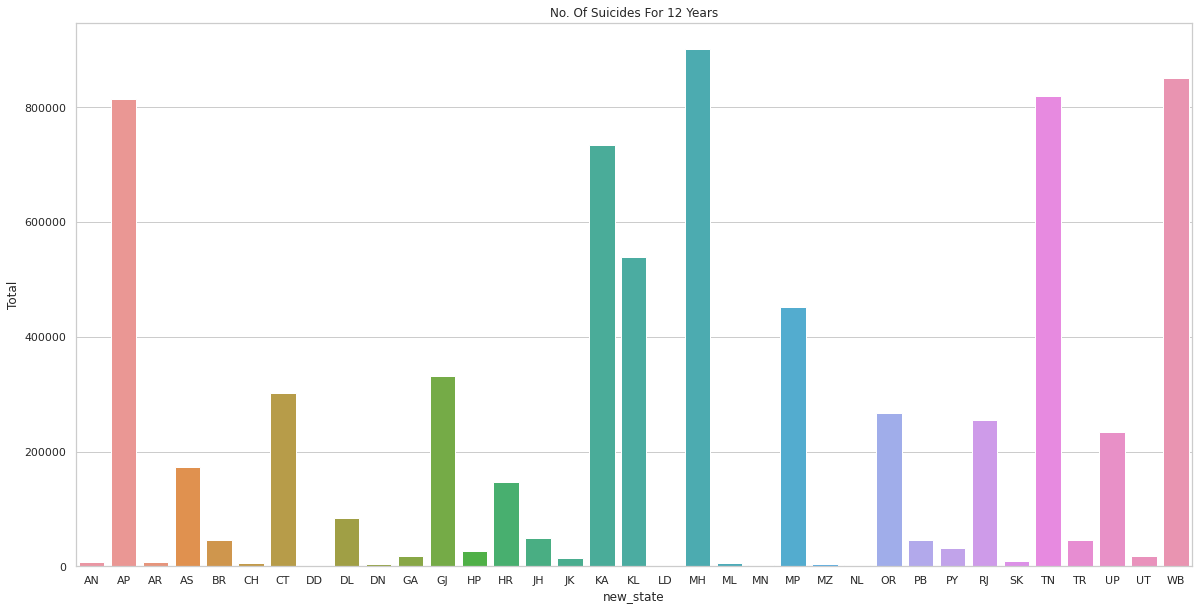

In [ ]:
a = new_df[(new_df['new_state'] != 'TOTAL (ALL INDIA)')& (new_df['new_state'] != 'TOTAL (STATES)') & (new_df['new_state'] != 'TOTAL (UTs)')]
a = a.groupby('new_state',as_index=False)['Total'].agg('sum')
a.iloc[a['Total'].idxmax()]
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
plt.title('No. Of Suicides For 12 Years')
sns.barplot(x = a['new_state'],y = a['Total'])

In [ ]:
a.sort_values('Total',ascending=False)

,new_state,Total
19,MH,901945
34,WB,849936
30,TN,818691
1,AP,814059
16,KA,734825
17,KL,538946
22,MP,451535
11,GJ,330858
6,CT,302354
25,OR,267234


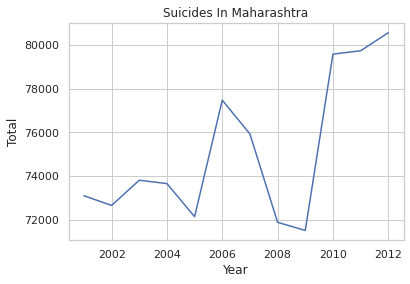

In [ ]:
q = new_df[new_df['new_state'] == 'MH']
q = q.groupby('Year',as_index=False)['Total'].agg('sum')
plt.title('Suicides In Maharashtra')
sns.lineplot(x = q['Year'],y=q['Total'])

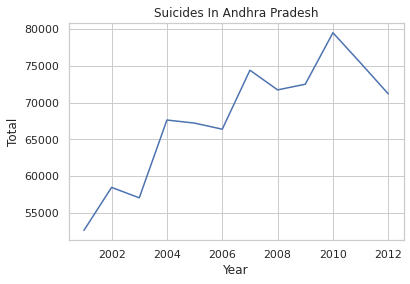

In [ ]:
q = new_df[new_df['new_state'] == 'AP']
q = q.groupby('Year',as_index=False)['Total'].agg('sum')
plt.title('Suicides In Andhra Pradesh')
sns.lineplot(x = q['Year'],y=q['Total'])

In [ ]:
q.sort_values('Total')

,Year,Total
0,2001,52610
2,2003,57045
1,2002,58465
5,2006,66380
4,2005,67210
3,2004,67630
11,2012,71190
7,2008,71729
8,2009,72500
6,2007,74410


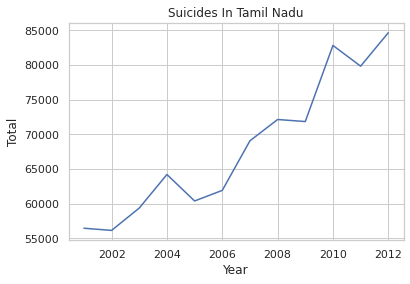

In [ ]:
q = new_df[new_df['new_state'] == 'TN']
q = q.groupby('Year',as_index=False)['Total'].agg('sum')
plt.title('Suicides In Tamil Nadu')
sns.lineplot(x = q['Year'],y=q['Total'])

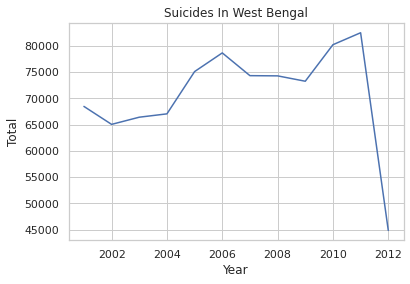

In [ ]:
q = new_df[new_df['new_state'] == 'WB']
q = q.groupby('Year',as_index=False)['Total'].agg('sum')
plt.title('Suicides In West Bengal')
sns.lineplot(x = q['Year'],y=q['Total'])

In [ ]:
q

,Year,Total
0,2001,68450
1,2002,65035
2,2003,66400
3,2004,67035
4,2005,75075
5,2006,78625
6,2007,74300
7,2008,74260
8,2009,73240
9,2010,80185


In [ ]:
q = new_df[(new_df['new_state'] != 'TOTAL (ALL INDIA)')& (new_df['new_state'] != 'TOTAL (STATES)') & (new_df['new_state'] != 'TOTAL (UTs)')]

In [ ]:
q = q.groupby(['Year'],as_index=False)['Total'].agg('sum')
q

,Year,Total
0,2001,542440
1,2002,551980
2,2003,554218
3,2004,568349
4,2005,569545
5,2006,590543
6,2007,613119
7,2008,625014
8,2009,635429
9,2010,672926


In [ ]:
q[q['Year'] == 2010].sort_values('Total')


,Year,Total
9,2010,672926


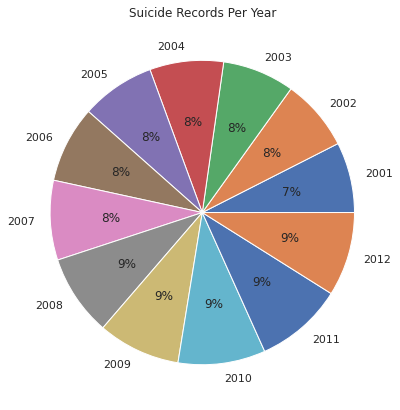

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(q['Total'], labels = q['Year'], autopct='%.0f%%')
plt.title("Suicide Records Per Year")

plt.show()

In [ ]:
new_df.columns

Index(['Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total',
       'new_state'],
      dtype='object')

In [ ]:
q = new_df.groupby('Age_group',as_index=False )['Total'].agg('sum')
q

,Age_group,Total
0,0-100+,8735586
1,0-14,98410
2,15-29,1534037
3,30-44,1471599
4,45-59,885177
5,60+,346925


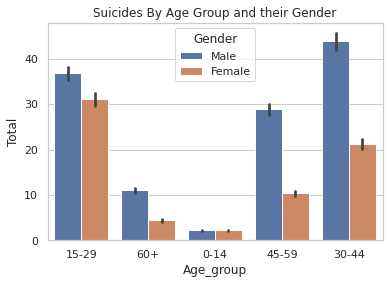

In [ ]:
q = new_df[(new_df['new_state'] != 'TOTAL (ALL INDIA)')& (new_df['new_state'] != 'TOTAL (STATES)') & (new_df['new_state'] != 'TOTAL (UTs)')]
q = q[q['Age_group']!='0-100+']
plt.title("Suicides By Age Group and their Gender")
sns.barplot(data = q,x = 'Age_group',y = 'Total',hue='Gender')

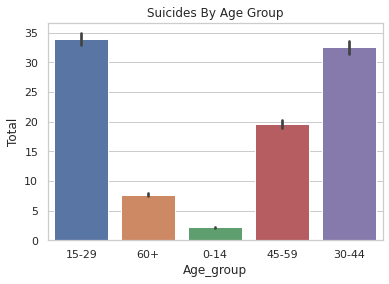

In [ ]:
plt.title("Suicides By Age Group")
sns.barplot(data = q,x = 'Age_group',y = 'Total')

In [ ]:
sum(q[q['Age_group'] == '0-14']['Total'])

98410

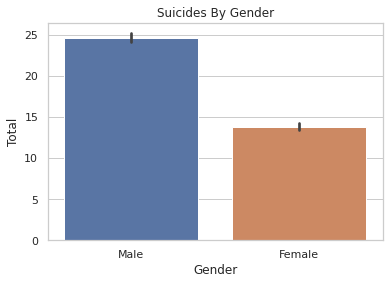

In [ ]:
plt.title("Suicides By Gender")
sns.barplot(data = q,x = 'Gender',y = 'Total')

Text(0.5, 1.0, 'Suicides By gender and reason')

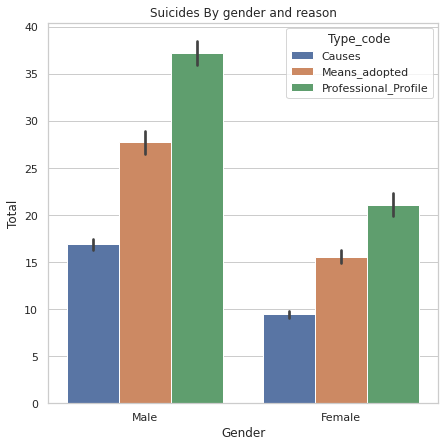

In [ ]:
# q = new_df[(new_df['new_state'] != 'TOTAL (ALL INDIA)')& (new_df['new_state'] != 'TOTAL (STATES)') & (new_df['new_state'] != 'TOTAL (UTs)')]

plt.figure(figsize= (7,7))
sns.barplot(data = q,x = 'Gender',y = 'Total',hue='Type_code')
plt.title("Suicides By gender and reason")

In [ ]:
!pip install squarify

In [ ]:
qb['Type'].unique()

NameError: ignored

In [ ]:
a = {'By Consuming Insecticides':'Insecticides',
     'By Consuming Other Poison':'Poison',
       'By Drowning':'Drowning',
      'By Fire-Arms':'Fire-Arms'
      , 'By Fire/Self Immolation':'Fire Immolation',
       'By Hanging':'By Hanging',
      'By Jumping from (Building)':'Jump Building',
       'By Jumping from (Other sites)':'Jump Other sites',
       'By Jumping off Moving Vehicles/Trains':'Jump Moving Vehicles',
      'By Machine':'By Machine',
       'By Other means':'Other means',
      'By Other means (please specify)':'Other means',
       'By Over Alcoholism':'Over Alcoholism',
      'By Overdose of sleeping pills':'sleeping pills',
       'By Self Infliction of injury':'Self Infliction',
       'By coming under running vehicles/trains':'under running vehicles',
       'By touching electric wires':'electric wires'}

In [ ]:
import squarify
# qb = q[q['Type_code'] == 'Means_adopted']
# qb = qb.groupby('Type',as_index=False)['Total'].agg('sum')
# qb['Type'] = qb['Type'].apply(lambda x: a[x])
plt.figure(figsize=(20,10))
plt.title('Means Adopted')

squarify.plot(sizes=qb['Total'],label=qb['Type'] , alpha=.8)
plt.axis('off')

In [ ]:
d = {
    'Hr. Secondary/Intermediate/Pre-Universit': 'pre-uni',
     'Middle': 'Middle',
     'Diploma':'Diploma',
     'Matriculate/Secondary':'Secondary',
     'No Education':'No Education',
      'Post Graduate and Above':'PG',
       'Primary':'Primary', 'Graduate':'Graduate',
}


In [ ]:
qb['Type'] = qb['Type'].apply(lambda x: d[x])

In [ ]:

plt.figure(figsize= (10,7))
sns.barplot(data = qba,x = 'Type',y = 'Total',hue='Gender')
plt.title("Suicides By gender and Education")

In [ ]:
qb = q[q['Type_code'] == 'Social_Status']
plt.figure(figsize= (10,7))
sns.barplot(data = qb,x = 'Type',y = 'Total',hue='Gender')
plt.title("Suicides By gender social Status")

In [ ]:
sns.barplot(x = [a],y = [b])

In [ ]:
# import seaborn as sns
q = new_df[(new_df['new_state'] == 'TOTAL (ALL INDIA)')]
d = {
    'Hr. Secondary/Intermediate/Pre-Universit': 'pre-uni',
     'Middle': 'Middle',
     'Diploma':'Diploma',
     'Matriculate/Secondary':'Secondary',
     'No Education':'No Education',
      'Post Graduate and Above':'PG',
       'Primary':'Primary', 'Graduate':'Graduate',
     'Divorcee':'Divorcee',
     'Married':'Married',
     'Seperated':'Seperated',
     'Widowed/Widower':'Widower',
     'Never Married':'Never Married'
}
q['Type'] = q['Type'].apply(lambda x: d[x])
grouped_year = q.groupby(["Year","Type"],as_index=False)["Total"].sum()
# grouped_year
sns.lmplot(x="Year", y="Total", hue="Type", data=grouped_year,height=7, aspect=11.7/8.27);

In [ ]:
# import seaborn as sns
q = new_df[(new_df['new_state'] == 'TOTAL (ALL INDIA)')&(new_df['Type_code'] == 'Education_Status') ]
d = {
    'Hr. Secondary/Intermediate/Pre-Universit': 'pre-uni',
     'Middle': 'Middle',
     'Diploma':'Diploma',
     'Matriculate/Secondary':'Secondary',
     'No Education':'No Education',
      'Post Graduate and Above':'PG',
       'Primary':'Primary', 
     'Graduate':'Graduate',
     'Divorcee':'Divorcee',
     'Married':'Married',
     'Seperated':'Divorcee',
     'Widowed/Widower':'Divorcee',
     'Never Married':'Never Married'
}
       


q['Type'] = q['Type'].apply(lambda x: d[x])
grouped_year = q.groupby(["Year","Type"],as_index=False)["Total"].sum()
# grouped_year

sns.lmplot(x="Year", y="Total", hue="Type", data=grouped_year,height=7, aspect=11.7/8.27);
plt.title('Suicides and Education')

In [ ]:
# import seaborn as sns
q = new_df[(new_df['new_state'] == 'TOTAL (ALL INDIA)')&(new_df['Type_code'] == 'Social_Status') ]
d = {
    'Hr. Secondary/Intermediate/Pre-Universit': 'pre-uni',
     'Middle': 'Middle',
     'Diploma':'Diploma',
     'Matriculate/Secondary':'Secondary',
     'No Education':'No Education',
      'Post Graduate and Above':'PG',
       'Primary':'Primary', 
     'Graduate':'Graduate',
     'Divorcee':'Divorcee',
     'Married':'Married',
     'Seperated':'Divorcee',
     'Widowed/Widower':'Divorcee',
     'Never Married':'Never Married'
}
q['Type'] = q['Type'].apply(lambda x: d[x])
grouped_year = q.groupby(["Year","Type"],as_index=False)["Total"].sum()
# grouped_year

sns.lmplot(x="Year", y="Total", hue="Type", data=grouped_year,height=7, aspect=11.7/8.27,);
plt.title('Suicides and Marital Status')
plt.figure(figsize=(2,2))

In [ ]:
q = new_df[(new_df['new_state'] != 'TOTAL (ALL INDIA)')& (new_df['new_state'] != 'TOTAL (STATES)') & (new_df['new_state'] != 'TOTAL (UTs)') & (new_df['Age_group'] != '0-100+')]
q['Age_group'].unique()


In [ ]:
f = q.groupby(['new_state','Gender'],as_index=False)['Total'].sum()
plt.figure(figsize=(19,9))
sns.barplot(x = 'new_state',y = 'Total',hue='Gender',data= f )

plt.title('Suicides by Gender in States')


In [ ]:
q = new_df[ (new_df['Age_group']!='0-100+') &(new_df['Type_code']=='Professional_Profile') &(new_df['Total']>0)]
q

,Year,Type_code,Type,Gender,Age_group,Total,new_state
37,2002,Professional_Profile,Farming/Agriculture Activity,Male,30-44,3,AN
39,2002,Professional_Profile,Service (Government),Female,30-44,1,AN
40,2002,Professional_Profile,Service (Government),Male,30-44,8,AN
62,2003,Professional_Profile,Service (Government),Male,30-44,7,AN
96,2001,Professional_Profile,Student,Male,0-14,1,AN
...,...,...,...,...,...,...,...
237502,2011,Professional_Profile,Others (Please Specify),Male,60+,195,WB
237503,2011,Professional_Profile,Public Sector Undertaking,Female,30-44,61,WB
237504,2011,Professional_Profile,Public Sector Undertaking,Male,30-44,245,WB
237505,2011,Professional_Profile,Service (Government),Male,60+,1,WB


Degress of freedom = 40
probability=0.950, critical=55.758, stat=3605.792
Dependent (We reject H0)
significance=0.050, p=0.000
Dependent (We reject H0)


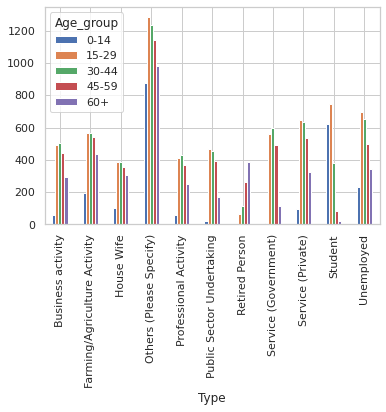

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# Marital_Situation=df[['Education','Marital_Status']]
# q = new_df[new_df['Type_code'] == 'Professional_profile']
crosstab = pd.crosstab(q["Type"], q["Age_group"])
g = crosstab.plot(kind="bar")
# g._legend.remove()
stat, p, dof, expected = chi2_contingency(crosstab)
print('Degress of freedom = %d' % dof)
# print(expected)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')

In [ ]:
q = new_df[(new_df['new_state'] != 'TOTAL (ALL INDIA)')& (new_df['new_state'] != 'TOTAL (STATES)') & (new_df['new_state'] != 'TOTAL (UTs)') & (new_df['Age_group'] != '0-100+')]
q = q.groupby(['Year','Gender'], as_index=False)['Total'].sum()
sns.lineplot(x = 'Year',y = 'Total',hue='Gender',data=q)
plt.title("Suicides All Over India")


In [ ]:
crosstab

Degress of freedom = 34
probability=0.950, critical=48.602, stat=505.034
Dependent (We reject H0)
significance=0.050, p=0.000
Dependent (We reject H0)


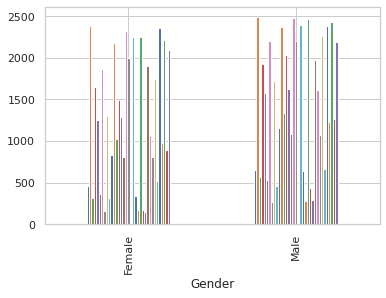

In [ ]:
q = new_df[(new_df['new_state'] != 'TOTAL (ALL INDIA)')& (new_df['new_state'] != 'TOTAL (STATES)') & (new_df['new_state'] != 'TOTAL (UTs)') & (new_df['Age_group'] != '0-100+') & (new_df['Total']>0)]
crosstab = pd.crosstab(q["Gender"], q["new_state"])
g = crosstab.plot(kind="bar")
g.get_legend().remove()
stat, p, dof, expected = chi2_contingency(crosstab)
print('Degress of freedom = %d' % dof)
# print(expected)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (We reject H0)')
else:
	print('Independent (We fail to reject H0)')

In [ ]:
q = new_df[(new_df['new_state'] == 'TOTAL (STATES)')]
q = q.groupby(['Year','Gender'], as_index=False)['Total'].sum()
sns.lineplot(x = 'Year',y = 'Total',hue='Gender',data=q)
plt.title("Suicides For States")

In [ ]:
q = new_df[(new_df['new_state'] == 'TOTAL (UTs)')]
q = q.groupby(['Year','Gender'], as_index=False)['Total'].sum()
sns.lineplot(x = 'Year',y = 'Total',hue='Gender',data=q)
plt.title("Suicides For union territories")

In [ ]:
q = new_df[(new_df['new_state'] == 'MH')]
q

,Year,Type_code,Type,Gender,Age_group,Total,new_state
118717,2001,Causes,Death of Dear Person,Female,15-29,19,MH
118718,2001,Causes,Death of Dear Person,Male,30-44,18,MH
118719,2001,Causes,Divorce,Male,30-44,8,MH
118720,2001,Causes,Dowry Dispute,Female,45-59,1,MH
118721,2001,Causes,Fall in Social Reputation,Male,15-29,21,MH
...,...,...,...,...,...,...,...
234546,2012,Means_adopted,Drowning,Female,60+,60,MH
234547,2012,Means_adopted,Fire Immolation,Female,30-44,289,MH
234548,2012,Means_adopted,Fire-Arms,Male,0-14,0,MH
234549,2012,Professional_Profile,Professional Activity,Male,0-14,0,MH
